<a href="https://colab.research.google.com/github/chomijeong/PythonProject.github.io/blob/main/Yearly%20Average%20IMDb%20Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------------------------------------------------------------------------------------------------------------------------
⭐ Numpy 배열 형태의 데이터 샘플 
[['1. The Shawshank Redemption (1994)' 'Drama' '9.3']
 ['2. The Godfather (1972)' 'Crime, Drama' '9.2']
 ['3. The Dark Knight (2008)' 'Action, Crime, Drama' '9.0']
 ...
 ['400. JFK (1991)' 'Drama, History, Thriller' '8.0']
 ['301. Nights of Cabiria (1957)' 'Drama' '8.1']
 ['302. Throne of Blood (1957)' 'Drama, History' '8.1']]
데이터 크기 :  (1000, 3)
------------------------------------------------------------------------------------------------------------------------
총 영화의 개수 :  1000
평점 평균 :  8.1
최고 평점 :  9.3
최저 평점 :  8.0
------------------------------------------------------------------------------------------------------------------------
⭐ 최고 평점 영화 목록 :
 The Shawshank Redemption (1994) - 평점 : 9.3
------------------------------------------------------------------------------------------------------------------------
⭐ 장르별 평균 평점 :
Animation : 8.

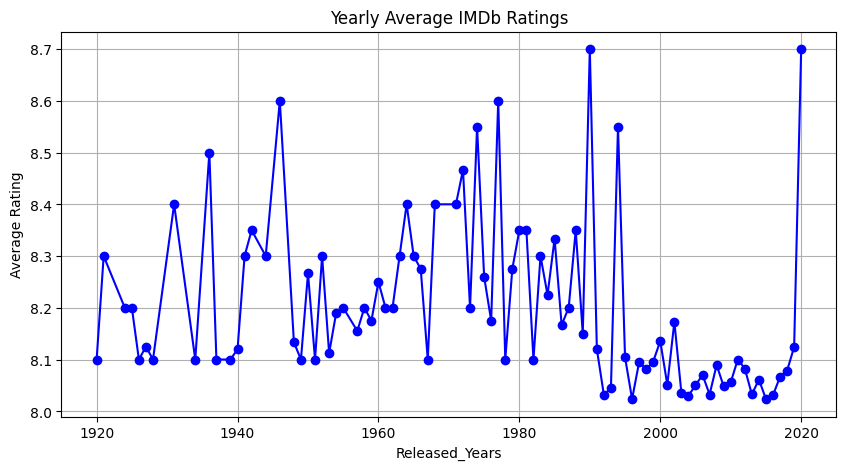

In [15]:
import numpy as np
import csv
import re
import matplotlib.pyplot as plt

movie_path = "/IMDB top 1000.csv"

data_list = []
with open(movie_path, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        data_list.append(row)

data_array = np.array(data_list)

title_idx = header.index("Title")
genre_idx = header.index("Genre")
rate_idx = header.index("Rate")

selected_data = data_array[:, [title_idx, genre_idx, rate_idx]]

filtered_data = selected_data[~np.any(selected_data == '', axis=1)]

print("-"*120)

print("⭐ Numpy 배열 형태의 데이터 샘플 ")
print(filtered_data)

print("데이터 크기 : ", filtered_data.shape)

print("-"*120)

x = filtered_data[:,2].astype(float)
print(f"총 영화의 개수 : ", filtered_data.shape[0])
print(f"평점 평균 : ", np.round(np.mean(x),1))
print(f"최고 평점 : ", np.max(x))
print(f"최저 평점 : ", np.min(x))

print("-"*120)

max_rating = np.max(x)
max_rating_movie = filtered_data[x == max_rating]
print("⭐ 최고 평점 영화 목록 :")
for movie in max_rating_movie:
    print(f"{movie[0][2:]} - 평점 : {movie[2]}")

Genre_column = data_array[:, genre_idx]

all_genres = set()
for genres in Genre_column:
    all_genres.update([g.strip() for g in genres.split(',')])

print("-"*120)

print("⭐ 장르별 평균 평점 :")

for genre in all_genres:
    filtered_ratings = data_array[[genre in g for g in Genre_column], rate_idx].astype(float)
    average_rating = np.mean(filtered_ratings)
    print(f"{genre} : {average_rating:.1f}")

print("-"*120)


# 연도별 평점 변화 분석
Released_Year_dict = {}

for movie in filtered_data:
    Released_Year = movie[0][-5:-1]
    if Released_Year not in Released_Year_dict:
        Released_Year_dict[Released_Year] = []
    Released_Year_dict[Released_Year].append(float(movie[2]))

Released_Year_avg_ratings = {Released_Year: np.mean(rates) for Released_Year, rates in Released_Year_dict.items()}
sorted_Released_Years = sorted(Released_Year_avg_ratings.items(), key=lambda x: int(x[0]))
print("⭐ 연도별 평균 평점 :")
for Released_Year, avg_rating in sorted_Released_Years:
    print(f"{Released_Year}: {avg_rating:.1f}")


print("-"*120)

Released_Years = [int(Released_Year) for Released_Year, _ in sorted_Released_Years]
avg_ratings = [avg for _, avg in sorted_Released_Years]

plt.figure(figsize=(10, 5))
plt.plot(Released_Years, avg_ratings, marker='o', linestyle='-', color='b')
plt.xlabel("Released_Years")
plt.ylabel("Average Rating")
plt.title("Yearly Average IMDb Ratings")
plt.grid(True)
plt.show()